# `Proyecto Final Machine Learning`

- Linnethy Julieth Lambraño Pérez
- Diego Armando Corredor Rivera

### `0. Librerias`

In [57]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
#from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from sklearn.neural_network import MLPClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

pd.options.display.float_format = '{:,.2f}'.format

### `1. Lectura de la base de datos`

In [5]:

Datos_Ob =pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

#Datos_Ob.info()


#### `1.1 Definición de X y Y`

In [6]:
X = Datos_Ob
X = X.drop(['NObeyesdad'],axis = 1)

y = Datos_Ob["NObeyesdad"]


In [130]:
Datos_Ob.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


### `2. Tratamiento de variables`

#### `2.1 Identificación de tipo de variables y valores faltantes`

In [7]:
#Datos_Ob.info()
#Datos_Ob.describe()

Se evidencia que en la base de datos no se encuentra ninguna cantidad de nulos, por lo cual no hay necesidad de realizar algún método de imputación. Por otro lado con el head e info se puede observar el tipo de variables que hay en la base de datos, el cual se clasifica a continuación:

##### 1.Variables Númericas: `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`

##### 2.Variables Dummy: `Gender`, `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC`, `MTRANS`

##### 3.Variables Ordinales: `CAEC`, `CALC`


In [8]:
#Definición:

Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

#### `2.2 Identificación datos extremos variables numéricas`

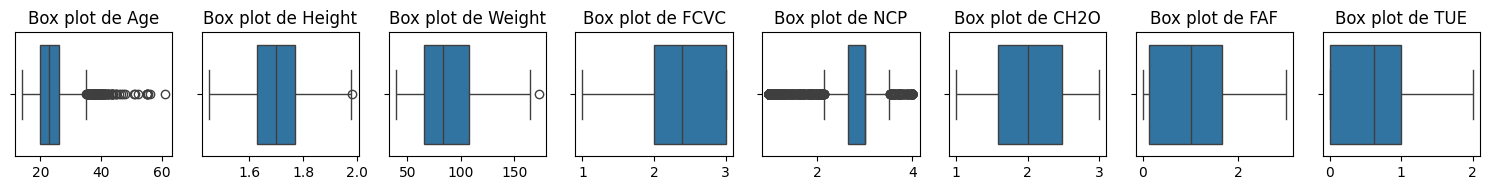

In [9]:

plt.figure(figsize=(15, 2))
for i, variable in enumerate(Numerica, 1):
    plt.subplot(1, 8, i)
    sns.boxplot(x=X[variable])
    plt.title(f'Box plot de {variable}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Dado que en las variables númericas como la edad se presenta valores continuos, se aplicara una transformación para convertir los datos y encontrar un buen ajuste del modelo.

In [10]:
X['Age'] = round(X['Age'],0)
X['FCVC'] = round(X['FCVC'],0)
X['NCP'] = round(X['NCP'],0)
X['CH2O'] = round(X['CH2O'],0)
X['FAF'] = round(X['FAF'],0)
X['TUE'] = round(X['TUE'],0)

#### `2.3 Definición de los tipos de variables`

In [11]:
from sklearn.model_selection import train_test_split

Numerica = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

X_Numerica = X[Numerica]
X_Categorica = X[Categorica]
X_Ordinal = X[Ordinales]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=17)

### `3. Preprocesamiento`

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Categorica_trans = OneHotEncoder(handle_unknown='ignore')
Numerical_trans = StandardScaler()
Ordinal_trans = OrdinalEncoder()


Preprocesamiento = ColumnTransformer(
    transformers=[
        ('Categorica', Categorica_trans, Categorica),
        ('Numerica', Numerical_trans, Numerica),
        ('Oridnal', Ordinal_trans, Ordinales)
    ])




### `4. Modelos y entrenamiento`

En esta sección se realizan varios modelos con el fin de encontrar el adecuado para los datos

#### `4.1. Random Forest`

In [24]:
Random_Forest = RandomForestClassifier(random_state=17)

Modelo_RF = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Random_Forest),       
    ]
)
Modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RF', RandomForestClassifier(random_state=17))])

In [53]:
Pres_RF=Modelo_RF['Preprocesamiento']
print(f"RF train accuracy: {Modelo_RF.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {Modelo_RF.score(X_test, y_test):.3f}")

RF train accuracy: 0.985
RF test accuracy: 0.792


#### `4.2. Naive Bayes`

In [44]:
Naive_Bayes = GaussianNB()

Modelo_NB = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Naive_Bayes),       
    ]
)
Modelo_NB.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RF', GaussianNB())])

In [45]:
Pres_NB=Modelo_NB['Preprocesamiento']
print(f"RF train accuracy: {Modelo_NB.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {Modelo_NB.score(X_test, y_test):.3f}")

RF train accuracy: 0.453
RF test accuracy: 0.430


#### `4.3. Árboles de Decisión`

In [46]:
Decision_Tree = DecisionTreeClassifier()

Modelo_DT = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Decision_Tree),       
    ]
)
Modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RF', DecisionTreeClassifier())])

In [47]:
Pres_DT=Modelo_DT['Preprocesamiento']
print(f"RF train accuracy: {Modelo_DT.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {Modelo_DT.score(X_test, y_test):.3f}")

RF train accuracy: 0.985
RF test accuracy: 0.759


#### `4.4. Regresión Logística`

In [48]:
Regresion_Logistica = LogisticRegression()

Modelo_RL = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Regresion_Logistica),       
    ]
)
Modelo_RL.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RL', LogisticRegression())])

In [49]:
Pres_RL=Modelo_RL['Preprocesamiento']
print(f"RF train accuracy: {Modelo_RL.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {Modelo_RL.score(X_test, y_test):.3f}")

RF train accuracy: 0.598
RF test accuracy: 0.541


#### `4.5. Redes Neuronales`

In [50]:
Redes_Neuronales = MLPClassifier()

Modelo_RN = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Regresion_Logistica),       
    ]
)
Modelo_RN.fit(X_train, y_train)


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RL', LogisticRegression())])

In [51]:
Pres_RN=Modelo_RF['Preprocesamiento']
print(f"RF train accuracy: {Modelo_RL.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {Modelo_RL.score(X_test, y_test):.3f}")

RF train accuracy: 0.598
RF test accuracy: 0.541


### `Conclusiones`

Teniendo en cuenta los resultados del ajustuste de los modelos en cuanto al accuracy, en donde se calculó con parámetros fijos, es pertinente utilizar las funciones de Gridsearch y Randomsearch con el fin de encontrar los párametros que permitan optimizar el accuracy.

### `5. Tuning parámetros`

Como se menciona en la sección 4.7, se utilizaran las funciones de Gridsearch y Randomsearch para establecer los paramenos que nos permitan decidir cual es el modelo mas optimo en cuanto al accuracy.

#### `5.1. Random Forest`

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


parametros_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'criterion':['gini', 'entropy'],
    'random_state': [17]
}
grid_search_RF = GridSearchCV(RandomForestClassifier(), parametros_RF, cv=5, scoring='accuracy')
grid_search_RF.fit(Pres_RF.transform(X_train), y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300],
                         'random_state': [17]},
             scoring='accuracy')

In [55]:
random_search_RF = RandomizedSearchCV(RandomForestClassifier(), parametros_RF, cv=5, scoring='accuracy',random_state=17)
random_search_RF.fit(Pres_RF.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [17]},
                   random_state=17, scoring='accuracy')

#### `5.1.2. Resultado`

In [56]:
# Grid
print("Mejores parámetros Grid:", grid_search_RF.best_params_)
print("Mejor accuracy Grid:", grid_search_RF.best_score_)

# Random
print("Mejores parámetros Random:", random_search_RF.best_params_)
print("Mejor accuracy Random:", random_search_RF.best_score_)

Mejores parámetros Grid: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 17}
Mejor accuracy Grid: 0.8056976805436061
Mejores parámetros Random: {'random_state': 17, 'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20, 'criterion': 'gini'}
Mejor accuracy Random: 0.8045107369234282


Con el resultado anterior se evidenia que el mejor modelo es el grid con un accuracy del 0.805

#### `5.1.3. Importancia de variables`

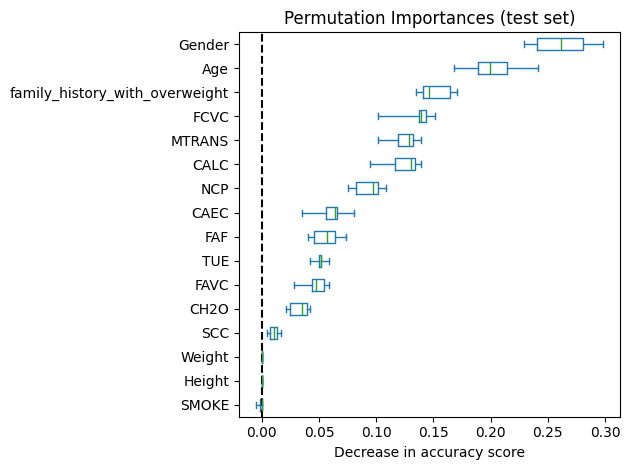

In [58]:

Result_RF = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = Result_RF.importances_mean.argsort()
importances = pd.DataFrame(
    Result_RF.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### `5.2. Naive Bayes`

In [150]:
Naive_Bayes = GaussianNB()

Modelo_NB = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_NB", Naive_Bayes),       
    ]
)
Modelo_NB.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_NB', GaussianNB())])

In [59]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
np.logspace(0,-9, num=10)


cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=17)

parametros_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search_NB = GridSearchCV(GaussianNB(), parametros_NB, cv=cv_method, scoring='accuracy')
grid_search_NB.fit(Pres_NB.transform(X_train), y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=17),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5....
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [60]:
random_search_NB = RandomizedSearchCV(GaussianNB(), parametros_NB, cv=5, scoring='accuracy',random_state=17)
random_search_NB.fit(Pres_NB.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=17, scoring='accuracy')

In [61]:
# Grid
print("Mejores parámetros Grid:", grid_search_NB.best_params_)
print("Mejor accuracy Grid:", grid_search_NB.best_score_)

# Random
print("Mejores parámetros Random:", random_search_NB.best_params_)
print("Mejor accuracy Random:", random_search_NB.best_score_)

Mejores parámetros Grid: {'var_smoothing': 0.02848035868435802}
Mejor accuracy Grid: 0.5351932295050305
Mejores parámetros Random: {'var_smoothing': 0.002848035868435802}
Mejor accuracy Random: 0.5195459413902691


Se evidencia que con los modelos de Naive Bayes, estos no presentan un accuracy más del 0.535

#### `5.2.1. Importancia de variables`

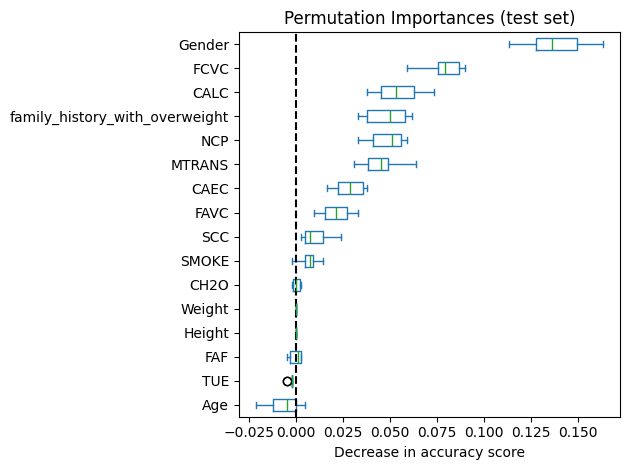

In [62]:

Result_NB = permutation_importance(
    Modelo_NB, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = Result_NB.importances_mean.argsort()
importances = pd.DataFrame(
    Result_NB.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### `5.3. Arboles de Decisión`

In [161]:
Decision_Tree = DecisionTreeClassifier()

Modelo_DT = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_NB", Decision_Tree),       
    ]
)
Modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_NB', DecisionTreeClassifier())])

In [63]:
parametros_DT = {
    'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'random_state':[0,2,4],
    'criterion':['gini', 'entropy'],
    'random_state': [17]
              } 


grid_search_DT = GridSearchCV(DecisionTreeClassifier(), parametros_DT, cv=5, scoring='accuracy')

grid_search_DT.fit(Pres_DT.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20],
                         'random_state': [17]},
             scoring='accuracy')

In [64]:
random_search_DT = RandomizedSearchCV(DecisionTreeClassifier(), parametros_DT, cv=5, scoring='accuracy',random_state=17)
random_search_DT.fit(Pres_DT.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20],
                                        'random_state': [17]},
                   random_state=17, scoring='accuracy')

In [65]:
# Grid
print("Mejores parámetros Grid:", grid_search_DT.best_params_)
print("Mejor accuracy Grid:", grid_search_DT.best_score_)

# Random
print("Mejores parámetros Random:", random_search_DT.best_params_)
print("Mejor accuracy Random:", random_search_DT.best_score_)

Mejores parámetros Grid: {'criterion': 'entropy', 'max_depth': 13, 'random_state': 17}
Mejor accuracy Grid: 0.7428915070321142
Mejores parámetros Random: {'random_state': 17, 'max_depth': 13, 'criterion': 'entropy'}
Mejor accuracy Random: 0.7428915070321142


Con el resultado anterior se evidenia que el mejor modelo es el grid con un accuracy del 0.805

#### `5.3.1. Importancia de variables`

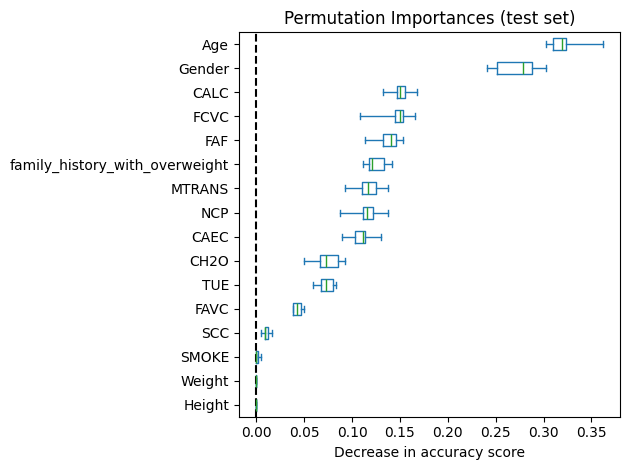

In [66]:

Result_DT = permutation_importance(
    Modelo_DT, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = Result_DT.importances_mean.argsort()
importances = pd.DataFrame(
    Result_DT.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### `5.4. Regresión Logística`

In [171]:
Logistica = LogisticRegression()

Modelo_RL = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Logistica),       
    ]
)
Modelo_RL.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RL', LogisticRegression())])

In [68]:
parametros_RL={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}


grid_search_RL = GridSearchCV(LogisticRegression(), parametros_RL, cv=5, scoring='accuracy')
grid_search_RL.fit(Pres_RL.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [69]:
random_search_RL = RandomizedSearchCV(LogisticRegression(), parametros_RL, cv=5, scoring='accuracy',random_state=17)
random_search_RL.fit(Pres_RL.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']},
                   random_state=17, scoring='accuracy')

In [70]:
# Grid
print("Mejores parámetros Grid:", grid_search_RL.best_params_)
print("Mejor accuracy Grid:", grid_search_RL.best_score_)

# Random
print("Mejores parámetros Random:", random_search_RL.best_params_)
print("Mejor accuracy Random:", random_search_RL.best_score_)

Mejores parámetros Grid: {'C': 100.0, 'penalty': 'l2'}
Mejor accuracy Grid: 0.5900444225940689
Mejores parámetros Random: {'penalty': 'l2', 'C': 100.0}
Mejor accuracy Random: 0.5900444225940689


#### `5.5. Redes Neuronales`

In [71]:
Redes_N = MLPClassifier()

Modelo_RN = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Redes_N),       
    ]
)
Modelo_RN.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Categorica',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Numerica', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('Oridnal', OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])])),
                ('Clasificador_RL', MLPClassifier())])

In [72]:
parametros_RN = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

grid_search_RN = GridSearchCV(MLPClassifier(solver = 'lbfgs', max_iter= 2000), parametros_RN, cv=5, scoring='accuracy')
grid_search_RN.fit(Pres_RN.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000, solver='lbfgs'),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'hidden_layer_sizes': [10, (10, 10), (20, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [73]:
random_search_RN = RandomizedSearchCV(MLPClassifier(solver = 'lbfgs', max_iter= 2000), parametros_RN, cv=5, scoring='accuracy',random_state=17)
random_search_RN.fit(Pres_RN.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000, solver='lbfgs'),
                   param_distributions={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'hidden_layer_sizes': [10, (10, 10),
                                                               (20, 20)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1]},
                   random_state=17, scoring='accuracy')

In [74]:
# Grid
print("Mejores parámetros Grid:", grid_search_RN.best_params_)
print("Mejor accuracy Grid:", grid_search_RN.best_score_)

# Random
print("Mejores parámetros Random:", random_search_RN.best_params_)
print("Mejor accuracy Random:", random_search_RN.best_score_)

Mejores parámetros Grid: {'alpha': 1.0, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.1}
Mejor accuracy Grid: 0.7434972696785068
Mejores parámetros Random: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (20, 20), 'alpha': 1.0}
Mejor accuracy Random: 0.7037890892490299


### `6. Evaluación de los modelos`

Random Forest Test Accuracy Grid: 0.7919621749408984
Decision Tree Test Accuracy Grid: 0.7470449172576832
Redes Neuronales Test Accuracy Grid: 0.16548463356973994
Random Forest Test Accuracy Random: 0.8014184397163121
Decision Tree Test Accuracy Random: 0.75177304964539
Redes Neuronales Test Accuracy Random: 0.5390070921985816


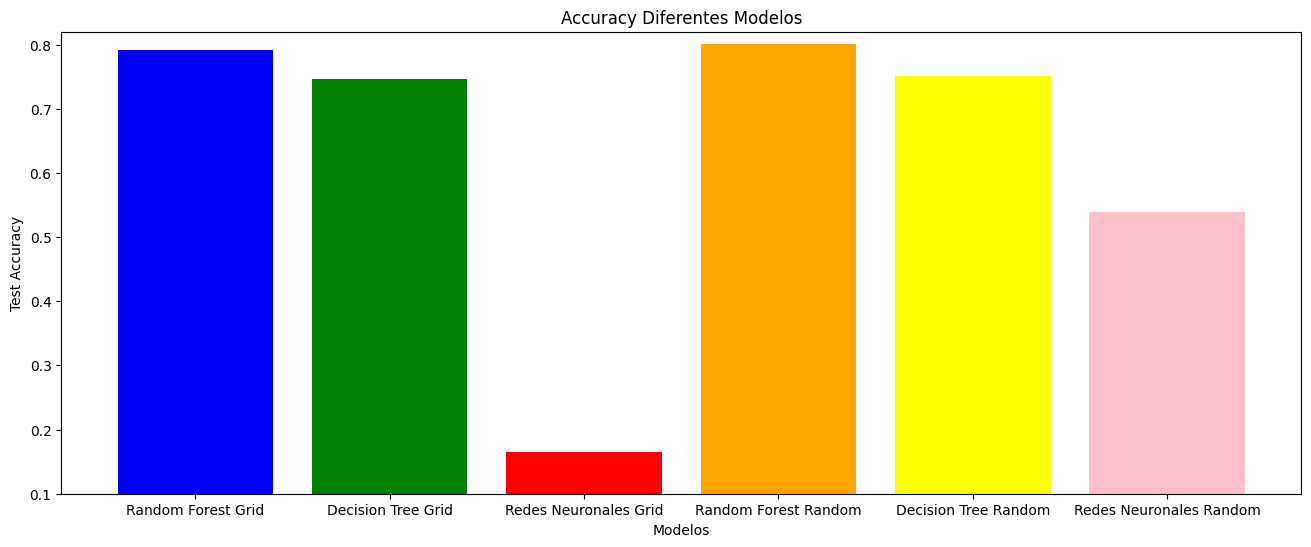

In [75]:
Mejor_Modelo_RF_Grid = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, n_estimators=100, random_state=17)
Mejor_Modelo_DT_Grid = DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=17)
Mejor_Modelo_RN_Grid = MLPClassifier(alpha=10.0, hidden_layer_sizes=(20,20),learning_rate_init=0.1, random_state=17)
Mejor_Modelo_RF_Random = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_split=5, n_estimators=200, random_state=17)
Mejor_Modelo_DT_Random = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=17)
Mejor_Modelo_RN_Random = MLPClassifier(alpha=1.0, hidden_layer_sizes=(20,20),learning_rate_init=0.1, random_state=17)


# Entrenamiento mejores modelos
Mejor_Modelo_RF_Grid.fit(Pres_RF.transform(X_train), y_train)
Mejor_Modelo_DT_Grid.fit(Pres_DT.transform(X_train), y_train)
Mejor_Modelo_RN_Grid.fit(Pres_RN.transform(X_train), y_train)
Mejor_Modelo_RF_Random.fit(Pres_RF.transform(X_train), y_train)
Mejor_Modelo_DT_Random.fit(Pres_DT.transform(X_train), y_train)
Mejor_Modelo_RN_Random.fit(Pres_RN.transform(X_train), y_train)


# Evaluar modelos en el test
RF_test_accuracy_Grid = Mejor_Modelo_RF_Grid.score(Pres_RF.transform(X_test), y_test)
DT_test_accuracy_Grid = Mejor_Modelo_DT_Grid.score(Pres_DT.transform(X_test), y_test)
RN_test_accuracy_Grid = Mejor_Modelo_RN_Grid.score(Pres_RN.transform(X_test), y_test)
RF_test_accuracy_Random = Mejor_Modelo_RF_Random.score(Pres_RF.transform(X_test), y_test)
DT_test_accuracy_Random = Mejor_Modelo_DT_Random.score(Pres_DT.transform(X_test), y_test)
RN_test_accuracy_Random = Mejor_Modelo_RN_Random.score(Pres_RN.transform(X_test), y_test)


print("Random Forest Test Accuracy Grid:", RF_test_accuracy_Grid)
print("Decision Tree Test Accuracy Grid:", DT_test_accuracy_Grid)
print("Redes Neuronales Test Accuracy Grid:", RN_test_accuracy_Grid)
print("Random Forest Test Accuracy Random:", RF_test_accuracy_Random)
print("Decision Tree Test Accuracy Random:", DT_test_accuracy_Random)
print("Redes Neuronales Test Accuracy Random:", RN_test_accuracy_Random)



Modelos = ['Random Forest Grid', 'Decision Tree Grid','Redes Neuronales Grid','Random Forest Random', 'Decision Tree Random','Redes Neuronales Random',]
Accuracy = [RF_test_accuracy_Grid, DT_test_accuracy_Grid,RN_test_accuracy_Grid, RF_test_accuracy_Random, DT_test_accuracy_Random,RN_test_accuracy_Random]

# Grafico
plt.figure(figsize=(16, 6))
plt.bar(Modelos, Accuracy, color=['blue', 'green', 'red', 'orange','yellow','pink'])
plt.xlabel('Modelos')
plt.ylabel('Test Accuracy')
plt.title('Accuracy Diferentes Modelos')
plt.ylim(0.1, 0.82) 
plt.show()

Con el gráfico se evidencia que el modelo Random Forest por medio de Randomsearch generá el accuracy más alto (0.8014)

### `7. Predicción`

In [76]:
y_pred = Mejor_Modelo_RF_Random.predict(Pres_RF.transform(X_test))
Resultado = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(Resultado.head())

                     Real           Predicción
366   Overweight_Level_II       Obesity_Type_I
1324       Obesity_Type_I       Obesity_Type_I
2098     Obesity_Type_III     Obesity_Type_III
19     Overweight_Level_I  Overweight_Level_II
514   Insufficient_Weight  Insufficient_Weight


#### `7.1 Clasificación`

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.81      0.82        54
      Normal_Weight       0.68      0.71      0.69        58
     Obesity_Type_I       0.74      0.81      0.78        70
    Obesity_Type_II       0.81      0.95      0.88        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.82      0.69      0.75        58
Overweight_Level_II       0.73      0.62      0.67        58

           accuracy                           0.80       423
          macro avg       0.80      0.80      0.80       423
       weighted avg       0.80      0.80      0.80       423



Se evidencia que la precisión y el recall en casi todas las categorias del peso son altas, por lo que se puede concluir que el modelo es efectivo en identificar y predecir en las categorias en que las personas estaran.


#### `7.2 Matriz de Confusión`

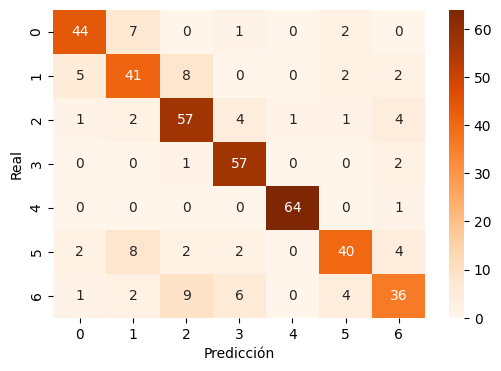

In [186]:
Matrix_Conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(Matrix_Conf, annot=True, fmt="d", cmap='Oranges')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

En la matriz de confusión se observa que 44 personas se clasificaron correctamente en la clase 0, 5 en la clase 1, 1 en la 2, 2 en la 5 y 1 en la 6. La clasificación más alta fue en la clase 4 (Obesity_Type_III)

#### `7.3 AUC y Curva ROC`

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

score_probability = Mejor_Modelo_DT_Grid.predict_proba(Pres_RF.transform(X_test))
score_probability
roc_auc_score(y_test, score_probability, multi_class = "ovr")

0.8564175992929588

El auc para este modelo es del 85%, lo que quiere decir que es un buen ajuste.

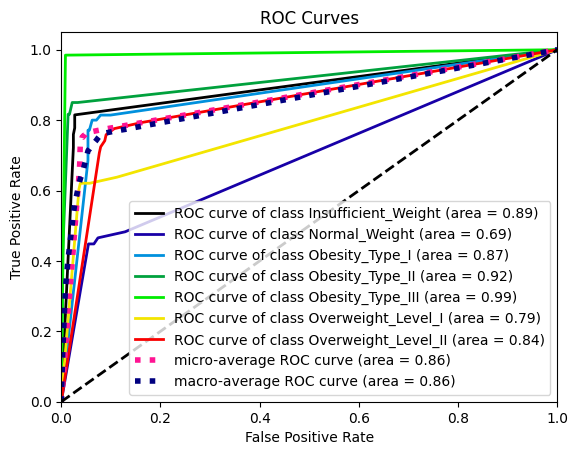

In [80]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, score_probability)
plt.show()

#### `7.4 Importancia de variables`

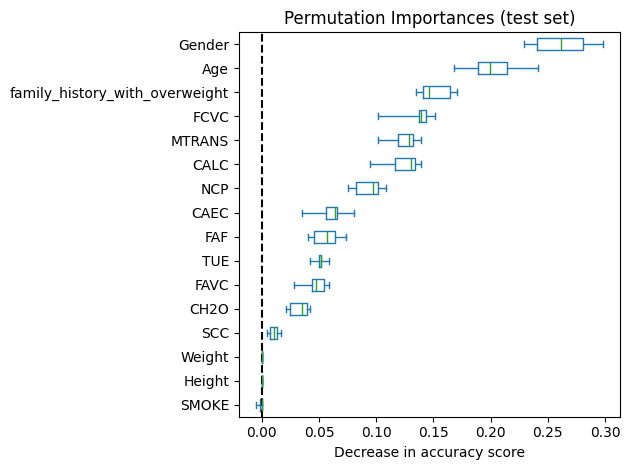

In [88]:
Result_RF = permutation_importance(
    Modelo_RF, X_test, y_test, n_repeats=10, random_state=17, n_jobs=2
)

sorted_importances_idx = Result_RF.importances_mean.argsort()
importances = pd.DataFrame(
    Result_RF.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

El modelo esta identificando que las variables que mas aportan son el Género, Edad, Si hay algun familiar con antecendentes de sobrepeso y la cantidad de veces que consume vegetales.